In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("../data/Checking_Logs.sqlite")

In [3]:
weekend = pd.read_sql("SELECT timestamp as datetime FROM checker WHERE uid LIKE 'user_%'", con, parse_dates=['datetime'])
weekend.head()

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [4]:
weekend['daytype'] = weekend['datetime'].dt.day_of_week.apply(lambda x: 'weekend' if x > 4 else 'working_day')
weekend

,datetime,daytype
0,2020-04-17 05:19:02.744528,working_day
1,2020-04-17 05:22:35.249331,working_day
2,2020-04-17 05:22:45.549397,working_day
3,2020-04-17 05:34:14.691200,working_day
4,2020-04-17 05:34:24.422370,working_day
...,...,...
3202,2020-05-21 20:19:06.872761,working_day
3203,2020-05-21 20:22:41.785725,working_day
3204,2020-05-21 20:22:41.877806,working_day
3205,2020-05-21 20:37:00.129678,working_day


In [22]:
avg_commit = weekend.groupby(by=[weekend['daytype'],
                                    weekend['datetime'].dt.hour,
                                    weekend['datetime'].dt.date]).count()
avg_commit = avg_commit.rename(columns={'datetime': 'count'})
avg_commit = avg_commit.groupby(level=['daytype', 'datetime']).mean().swaplevel(i=0, j=1).unstack().droplevel(0, axis='columns')
avg_commit.index.name = 'hour'
avg_commit = avg_commit.fillna(0)
avg_commit

daytype,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,0.000000
3,1.000000,2.000000
5,2.000000,7.500000
6,0.000000,1.500000
7,4.000000,5.166667
8,7.000000,3.700000
9,3.666667,6.000000
10,7.000000,13.200000


In [27]:
for hour in range(0,23):
    if hour not in avg_commit.index.values:
        avg_commit.loc[hour] = [0, 0]
        avg_commit.sort_index(inplace=True)

avg_commit

daytype,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,0.000000
2,0.000000,0.000000
3,1.000000,2.000000
4,0.000000,0.000000
5,2.000000,7.500000
6,0.000000,1.500000
7,4.000000,5.166667
8,7.000000,3.700000


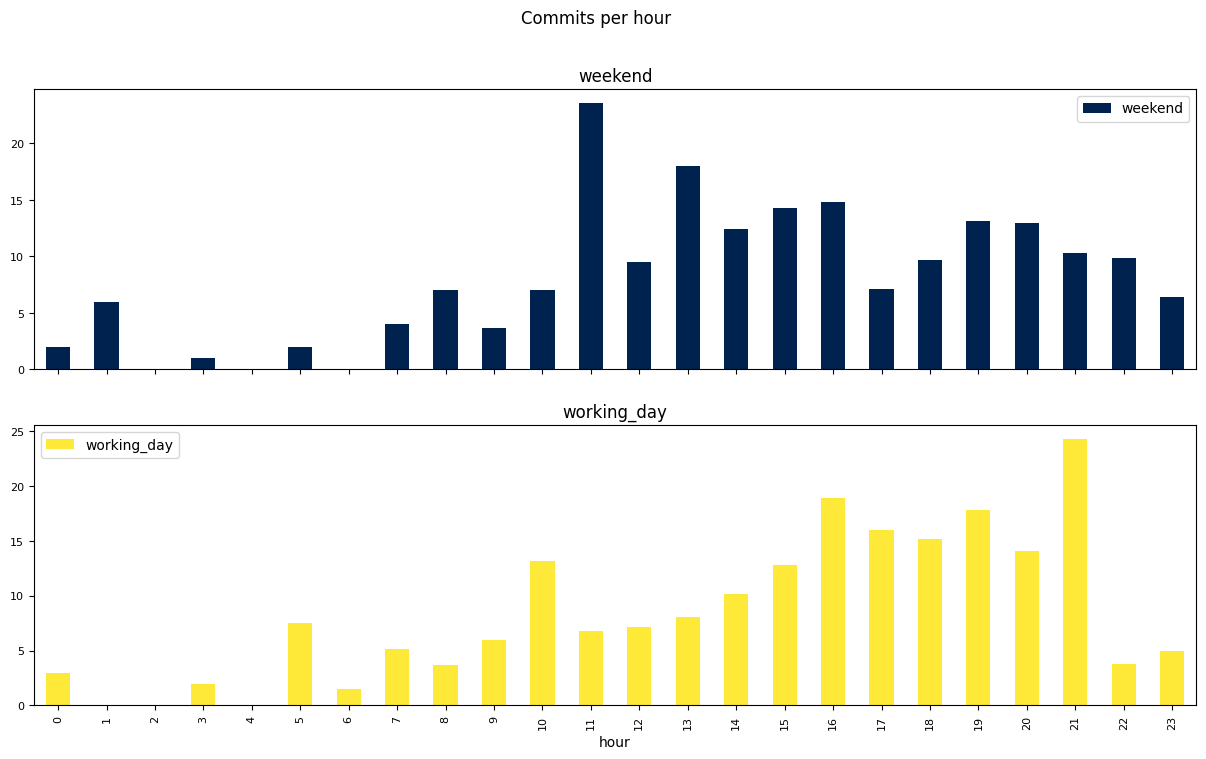

In [36]:
plt = avg_commit.plot.bar(figsize=(15,8),
                          fontsize = 8,
                          rot = 90,
                          title = 'Commits per hour',
                          colormap= 'cividis',
                          subplots=True,
                          alpha = 1)

In [37]:
con.close()

## Is the dynamic different on working days and weekends?
- yes. during working days max commits are in `11 hour` and during weekends max commits are in `21 hours`